In [2]:
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from func_draw import smooth_curve
folders = ['snm_50_l9666.txt_c10_size_50_', 'zipf_50_9000_cr3000.txt_c10_size_50_', 'zipf_50_9000_cps.txt_c10_size_50_']
folder_title = {
    'snm_50_l9666.txt_c10_size_50_' : 'SNM',
    'zipf_50_9000_cr3000.txt_c10_size_50_' : 'Dyna-Zipf-1',
    'zipf_50_9000_cps.txt_c10_size_50_' : 'Dyna-Zipf-2',
    }
model_type = 'DQN'
reward_func = 'our'
# penalty_para = ''

features = ['noFfqr_new_norm', 
            'noFrt_new_norm',
            'noFlf_new_norm',
            'noFmf_new_norm',
            'noFsf_new_norm',
            'noCd_new_norm', 
            'noCcs_new_norm',
            'noCrc_new_norm',
            'noCrs_new_norm',
            'full_new_norm']
files = ["{}_{}".format(model_type, feature) for feature in features]
# eval reward function

DQN_noFfqr_new_norm 0.6560107593627147
DQN_noFrt_new_norm 0.6604593420235878
DQN_noFlf_new_norm 0.6588040554521002
DQN_noFmf_new_norm 0.6523898199875854
DQN_noFsf_new_norm 0.6661493896130768
DQN_noCd_new_norm 0.6364576867370163
DQN_noCcs_new_norm 0.6665632112559486
DQN_noCrc_new_norm 0.660045520380716
DQN_noCrs_new_norm 0.6644941030415891
DQN_full_new_norm 0.6644941030415891
ok
100


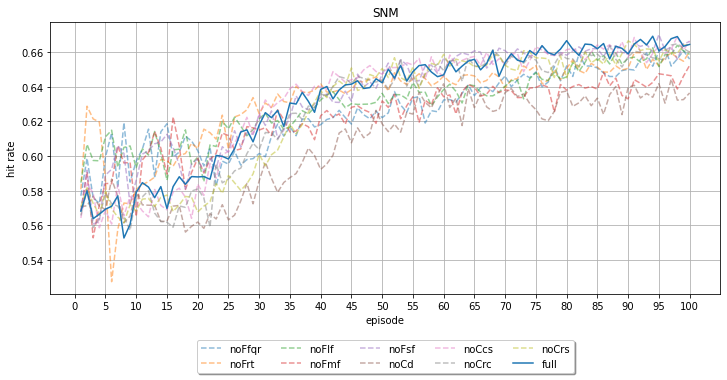

DQN_noFfqr_new_norm 0.728
DQN_noFrt_new_norm 0.7393333333333333
DQN_noFlf_new_norm 0.7344444444444445
DQN_noFmf_new_norm 0.7422222222222222
DQN_noFsf_new_norm 0.7346666666666667
DQN_noCd_new_norm 0.7208888888888889
DQN_noCcs_new_norm 0.7248888888888889
DQN_noCrc_new_norm 0.731
DQN_noCrs_new_norm 0.731
DQN_full_new_norm 0.7314444444444445
ok
100


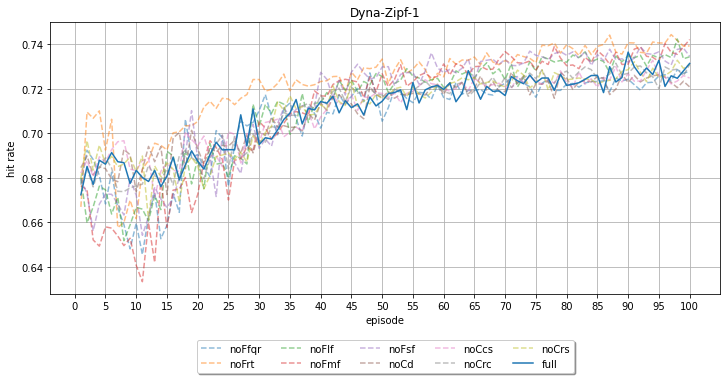

DQN_noFfqr_new_norm 0.5723333333333334
DQN_noFrt_new_norm 0.5787777777777777
DQN_noFlf_new_norm 0.574
DQN_noFmf_new_norm 0.5785555555555556
DQN_noFsf_new_norm 0.5813333333333334
DQN_noCd_new_norm 0.5695555555555556
DQN_noCcs_new_norm 0.5724444444444444
DQN_noCrc_new_norm 0.5783333333333334
DQN_noCrs_new_norm 0.5746666666666667
DQN_full_new_norm 0.5691111111111111
ok
100


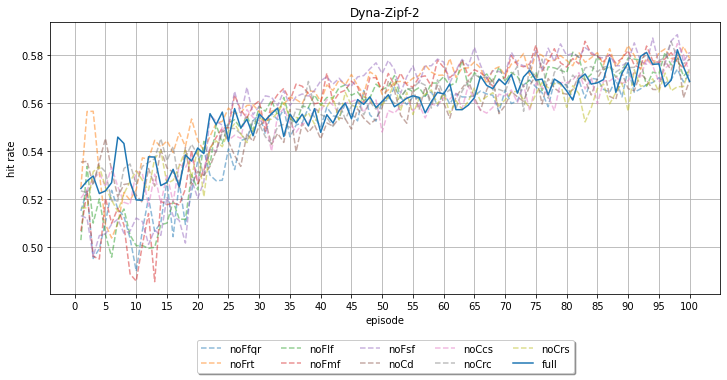

In [5]:
if __name__ == "__main__":
    for folder in folders:
        plt.figure(figsize=(12,5), facecolor=(1,1,1,1))
        hit_rates = {}
        check = True
        for file_ in files:
            try:
                with open('./logs/ablation/'+folder+'/'+file_+'/'+file_+'_hitrate.csv', 'r') as filepath:
                    rows = csv.reader(filepath)
                    for row in rows:
                        print(file_, row[-1])
                        hit_rates[file_] = [float(i) for i in row]
                        # print(hit_rates)
            except:
                # print('./logs/ablation/'+folder+'/'+file_+'/'+file_+'_hitrate.csv'+" not found")
                pass
                # check = False
        print("ok")
        if check:
            data_len = len(hit_rates[files[0]])
            # data_len = 80
            print(data_len)
        for file_ in files:
            try:
                if file_.split('_')[1] == 'full':
                    plt.plot([i+1 for i in range(data_len)], (hit_rates[file_]), label='full', color='C0')
                else:
                    plt.plot([i+1 for i in range(data_len)], (hit_rates[file_]), label=file_.split('_')[1], alpha=0.5, linestyle='--')
            except: 
                plt.plot([i+1 for i in range(data_len)], hit_rates[file_], label='full', color='C0')
                # plt.plot([i+1 for i in range(data_len)], hit_rates[file_], label=' ', alpha=0)
        try:
            plt.xticks([i for i in range(0,data_len+1,5)])
            plt.grid(True)
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
            ncol=5, fancybox=True, shadow=True)
            plt.xlabel('episode')
            plt.ylabel('hit rate')
            plt.title(folder_title[folder])
            # plt.savefig('./fig/'+folder_title[folder]+'_ablation.png', dpi=500, bbox_inches='tight')
            plt.show()
        except: pass